In [12]:
import pandas as pd
import numpy as np
import plotnine as pn
from scipy import stats


In [31]:
indir = "/cbica/projects/csdsi/cleaned_paper_analysis/data/dice_scores/permutation_stats/"
groups = ["retro_wthn_acc", "retro_btwn_acc", "retro_btwn_rel"]
cs_acqs = ["HA-SC92+55-1", "HA-SC92+55-2",  "HA-SC92", "HA-SC55-1",  "HA-SC55-2", "RAND57"]
cs_acqs = ["HASC92-55_run-01", "HASC92-55_run-02",  "HASC92", "HASC55_run-01",  "HASC55_run-02", "RAND57"]

scan_times = [11.9, 11.8, 7.4, 4.5, 4.3, 5.4]
scan_df = pd.DataFrame(index = cs_acqs)
scan_df["Time"] = scan_times
for grp in groups:
    stats_df = pd.read_csv("/cbica/projects/csdsi/cleaned_paper_analysis/data/dice_scores/"+grp+"/all_tracks_medians.csv")
    for acq in cs_acqs:
        acq_med = stats_df[acq].median()
        scan_df.loc[acq, grp] = acq_med

In [32]:
scan_df

,Time,retro_wthn_acc,retro_btwn_acc,retro_btwn_rel
HASC92-55_run-01,11.9,0.815870,0.774298,0.787894
HASC92-55_run-02,11.8,0.817301,0.776683,0.787018
HASC92,7.4,0.798090,0.765222,0.777215
HASC55_run-01,4.5,0.755071,0.734255,0.755172
HASC55_run-02,4.3,0.741338,0.723267,0.759380
RAND57,5.4,0.722689,0.707508,0.730788


In [33]:
# def get_stats_and_linregress(scan_df):
# Get line of best fit:
fit_df = pd.DataFrame()
r_df = pd.DataFrame(index = groups, columns = ["Rsq", "Slope", "p-value"]) 
fit_df["Time"] = scan_df["Time"]
for grp in groups:
    s, i, r, p, std = stats.linregress(scan_df["Time"].astype(float), scan_df[grp].astype(float))
    fit_df[grp] = scan_df["Time"]*s + i
    fit_df["raw_"+grp] = scan_df[grp]
    r_df.loc[acq, "Rsq"] = r**2
    r_df.loc[acq, "Slope"] = s
    r_df.loc[acq, "p-value"] = p
#     r_df.to_csv("/cbica/projects/csdsi/cleaned_paper_analysis/data/dice_scores/"+grp+"/"+mtrk+"_median_tracks_slopes_with_reliability.csv")
#     return fit_df

In [34]:
fit_df

,Time,retro_wthn_acc,raw_retro_wthn_acc,retro_btwn_acc,raw_retro_btwn_acc,retro_btwn_rel,raw_retro_btwn_rel
HASC92-55_run-01,11.9,0.820102,0.815870,0.778214,0.774298,0.788394,0.787894
HASC92-55_run-02,11.8,0.819067,0.817301,0.777494,0.776683,0.787885,0.787018
HASC92,7.4,0.773507,0.798090,0.745791,0.765222,0.765481,0.777215
HASC55_run-01,4.5,0.743479,0.755071,0.724896,0.734255,0.750714,0.755172
HASC55_run-02,4.3,0.741408,0.741338,0.723455,0.723267,0.749696,0.759380
RAND57,5.4,0.752798,0.722689,0.731381,0.707508,0.755297,0.730788


In [35]:
palette_col = ["#7781a6", "#477998", "#298e91", "#d24b4e", "#dd6d40", "#ffbf1f"]
thme = pn.theme_bw() + pn.theme(plot_title = pn.element_text(face="bold", size=16), \
            axis_title = pn.element_text(face="bold", size=14), \
            axis_text_x=pn.element_text(hjust=1, size=12, color="black"), \
            axis_text_y=pn.element_text(size=12, color="black"), \
            axis_ticks = pn.element_line(size = 0.2), \
            panel_border = pn.element_rect(fill = "white", colour="black"), \
            panel_grid_major = pn.element_blank(), \
            panel_grid_minor = pn.element_blank())
fit_df["Acquisition"] = cs_acqs
cat = pd.Categorical(fit_df["Acquisition"], categories = cs_acqs)
pm = pn.ggplot(data=fit_df, mapping=pn.aes(x='Time', y='raw_retro_wthn_acc', color=cat)) \
                + pn.scale_color_manual(values=palette_col) \
                + pn.geom_point() \
                + thme


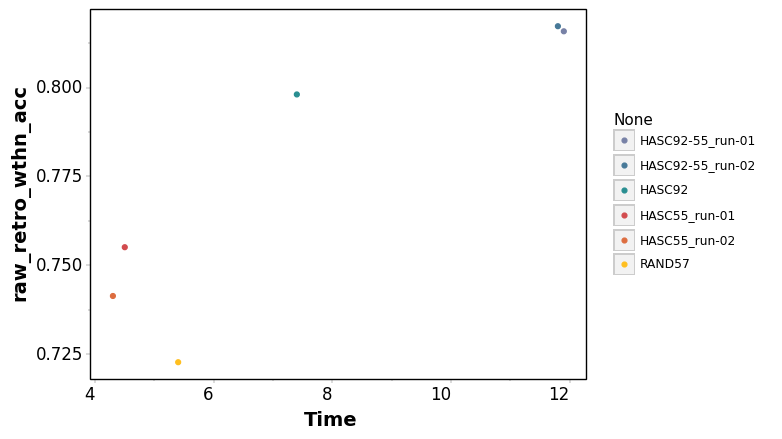

In [36]:
print(pm)